# Task 2 : Movie Rating Prediction with Python

## Importing Required Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Loading the dataset into a pandas DataFrame

In [4]:
import chardet
with open('IMDb Movies India.csv', 'rb') as f:
    result = chardet.detect(f.read())  
df = pd.read_csv("IMDb Movies India.csv",encoding=result['encoding'])

In [75]:
df = pd.read_csv("D:\doc\Virtual internship\CodSoft\Task 2\IMDb Movies India.csv",encoding=result['encoding'])

## Display the first few rows of the dataset

In [76]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## Get the summary statistics of the dataset

In [77]:
df.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-90.551098,5.841621
std,1985.176836,1.381777
min,-2022.000000,1.100000
25%,-1984.000000,4.900000
50%,-1936.000000,6.000000
75%,2002.000000,6.800000
max,2022.000000,10.000000


## Total rows and columns

In [78]:
df.shape

(15509, 10)

## Check for missing values

In [79]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

## Check the data types of the columns

In [80]:
df.dtypes

Name         object
Year        float64
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

## Create a bar plot of movie ratings

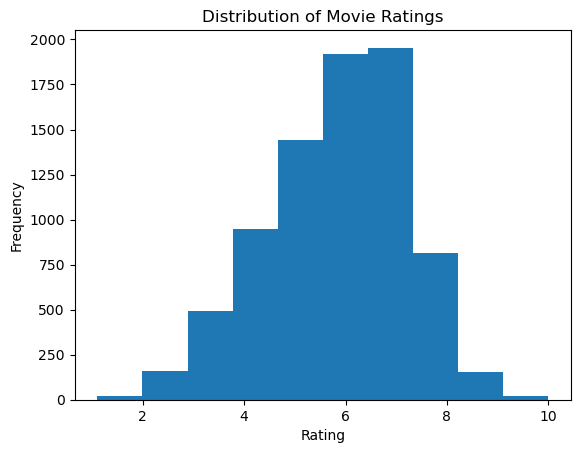

In [81]:
plt.hist(df['Rating'])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

## Creating pairplot of the values 

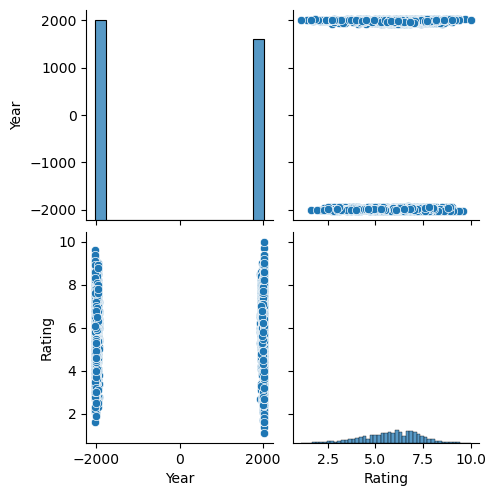

In [82]:
sns.pairplot(df)
plt.show()

## Dropping NA values

In [83]:
df = df.dropna()

# Data Preprocessing and model building

In [84]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df)

# Split the dataset into features and target variable
X = df.drop('Rating', axis=1)
y = df['Rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
# Initialize a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [86]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the model accuracy
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)


Mean Squared Error: 1.4607061212049355
Model Accuracy: 0.20264208063694678


# Using Random forest to improve accuracy

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
# Standardize the numerical features
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=np.number).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [89]:

# Split the dataset into features and target variable
X = df.drop('Rating', axis=1)
y = df['Rating']


In [90]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [91]:
from sklearn.ensemble import RandomForestRegressor
# Initialize a different regression model (e.g. Random Forest Regressor)
model = RandomForestRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)


RandomForestRegressor()

In [92]:

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the model accuracy
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)


Mean Squared Error: 0.740869238494811
Model Accuracy: 0.22865886467856145


In [93]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

In [94]:
r2

0.22865886467856145

# after doing more preprocessing manually on data to improve random forest accuracy

In [67]:

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the model accuracy
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)


Mean Squared Error: 0.7381550618724861
Model Accuracy: 0.23148467518404336


In [68]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

In [69]:
r2

0.23148467518404336